# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## 1. Загрузка и подготовка данных

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from joblib import dump
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error
randomstate = 12345

Подключил библиотеки.

In [2]:
geo_0 = pd.read_csv('/datasets/geo_data_0.csv')
geo_1 = pd.read_csv('/datasets/geo_data_1.csv')
geo_2 = pd.read_csv('/datasets/geo_data_2.csv')

Загрузил данные.

In [3]:
print('geo_0 ##############################')
print(geo_0.head(5))
print()
print('geo_1 ##############################')
print(geo_1.head(5))
print()
print('geo_2 ##############################')
print(geo_2.head(5))

geo_0 ##############################
      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647

geo_1 ##############################
      id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305

geo_2 ##############################
      id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX

Просмотрел первые 5 значений в каждой таблице.

In [4]:
print('geo_0 ##############################')
print(geo_0.shape)
print()
print('geo_1 ##############################')
print(geo_1.shape)
print()
print('geo_2 ##############################')
print(geo_2.shape)

geo_0 ##############################
(100000, 5)

geo_1 ##############################
(100000, 5)

geo_2 ##############################
(100000, 5)


Просмотрел информацию о количестве наблюдений и признаков в каждой таблице, вижу, что в таблице 100 000 строк и 5 столбцов.

In [5]:
print('geo_0 ##############################')
print(geo_0.columns)
print()
print('geo_1 ##############################')
print(geo_1.columns)
print()
print('geo_2 ##############################')
print(geo_2.columns)

geo_0 ##############################
Index(['id', 'f0', 'f1', 'f2', 'product'], dtype='object')

geo_1 ##############################
Index(['id', 'f0', 'f1', 'f2', 'product'], dtype='object')

geo_2 ##############################
Index(['id', 'f0', 'f1', 'f2', 'product'], dtype='object')


Вывел названия столбцов и проверил их.

In [6]:
geo_0 = geo_0.drop(columns=['id']) # удалил столбец ID и перезаписал DF
geo_1 = geo_1.drop(columns=['id']) # удалил столбец ID и перезаписал DF
geo_2 = geo_2.drop(columns=['id']) # удалил столбец ID и перезаписал DF

Удалил столбец ID и перезаписал df.

In [7]:
print('geo_0 ##############################')
print(geo_0.duplicated().sum())
print()
print('geo_1 ##############################')
print(geo_1.duplicated().sum())
print()
print('geo_2 ##############################')
print(geo_2.duplicated().sum())

geo_0 ##############################
0

geo_1 ##############################
0

geo_2 ##############################
0


Проверил количество явных дубликатов.

In [8]:
print('geo_0 ##############################')
print(geo_0.isna().sum())
print()
print('geo_1 ##############################')
print(geo_1.isna().sum())
print()
print('geo_2 ##############################')
print(geo_2.isna().sum())

geo_0 ##############################
f0         0
f1         0
f2         0
product    0
dtype: int64

geo_1 ##############################
f0         0
f1         0
f2         0
product    0
dtype: int64

geo_2 ##############################
f0         0
f1         0
f2         0
product    0
dtype: int64


Проверил количество пропущенных значений.

In [9]:
print('geo_0 ##############################')
print(geo_0.nunique())
print()
print('geo_1 ##############################')
print(geo_1.nunique())
print()
print('geo_2 ##############################')
print(geo_2.nunique())

geo_0 ##############################
f0         100000
f1         100000
f2         100000
product    100000
dtype: int64

geo_1 ##############################
f0         100000
f1         100000
f2         100000
product        12
dtype: int64

geo_2 ##############################
f0         100000
f1         100000
f2         100000
product    100000
dtype: int64


Проверил количество уникальных значений.

In [10]:
print('geo_0 ##############################')
print(geo_0.info())
print()
print('geo_1 ##############################')
print(geo_1.info())
print()
print('geo_2 ##############################')
print(geo_2.info())

geo_0 ##############################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB
None

geo_1 ##############################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB
None

geo_2 ##############################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #

Просмотрел общую информацию по датафреймам.

In [11]:
print('geo_0 ##############################')
corr_0 = geo_0.corr()['product'].sort_values()
print(corr_0)
print()
print('geo_1 ##############################')
corr_1 = geo_1.corr()['product'].sort_values()
print(corr_1)
print()
print('geo_2 ##############################')
corr_2 = geo_2.corr()['product'].sort_values()
print(corr_2)

geo_0 ##############################
f1        -0.192356
f0         0.143536
f2         0.483663
product    1.000000
Name: product, dtype: float64

geo_1 ##############################
f0        -0.030491
f1        -0.010155
f2         0.999397
product    1.000000
Name: product, dtype: float64

geo_2 ##############################
f0        -0.001987
f1        -0.001012
f2         0.445871
product    1.000000
Name: product, dtype: float64


Посчитал корреляцию в зависимости от целевого признака для каждого DS

## 2. Обучение и проверка модели

### 2.1 Разбейте данные на обучающую и валидационную выборки в соотношении 75:25

In [12]:
#print('geo_0 ##############################')
target_0 = geo_0['product'] #выделил признак для обучающей выборки
features_0 = geo_0.drop(['product'] , axis=1) #выделил целевой признак для обучающей выборки
#print('geo_1 ##############################')
target_1 = geo_1['product'] #выделил признак для обучающей выборки
features_1 = geo_1.drop(['product'] , axis=1) #выделил целевой признак для обучающей выборки
#print('geo_1 ##############################')
target_2 = geo_2['product'] #выделил признак для обучающей выборки
features_2 = geo_2.drop(['product'] , axis=1) #выделил целевой признак для обучающей выборки

Выделил признаки для train и valid

In [13]:
#print('geo_0 ##############################')
features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(
    features_0, target_0, test_size=0.25, random_state=randomstate) 
#print('geo_1 ##############################')
features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(
    features_1, target_1, test_size=0.25, random_state=randomstate) 
#print('geo_2 ##############################')
features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(
    features_2, target_2, test_size=0.25, random_state=randomstate) 

Разделил DS на обучающую и валидационную выборки в пропорции 75/25%

In [14]:
print('geo_0 ##############################')
print('Train - 75% |', features_train_0.shape)
print('Train - 75% |', target_train_0.shape)
print('Valid - 25% |', features_valid_0.shape)
print('Valid - 25% |', target_valid_0.shape)
print()
print('geo_1 ##############################')
print('Train - 75% |', features_train_1.shape)
print('Train - 75% |', target_train_1.shape)
print('Valid - 25% |', features_valid_1.shape)
print('Valid - 25% |', target_valid_1.shape)
print('geo_2 ##############################')
print()
print('Train - 75% |', features_train_2.shape)
print('Train - 75% |', target_train_2.shape)
print('Valid - 25% |', features_valid_2.shape)
print('Valid - 25% |', target_valid_2.shape)

geo_0 ##############################
Train - 75% | (75000, 3)
Train - 75% | (75000,)
Valid - 25% | (25000, 3)
Valid - 25% | (25000,)

geo_1 ##############################
Train - 75% | (75000, 3)
Train - 75% | (75000,)
Valid - 25% | (25000, 3)
Valid - 25% | (25000,)
geo_2 ##############################

Train - 75% | (75000, 3)
Train - 75% | (75000,)
Valid - 25% | (25000, 3)
Valid - 25% | (25000,)


Проверил количество наблюдений в каждой выборке

### 2.2 Обучите модель и сделайте предсказания на валидационной выборке

In [15]:
#print('geo_0 ##############################')
model_0 = LinearRegression() # инициализировал модель LinearRegression
model_0.fit(features_train_0, target_train_0) # обучил модель на тренировочной выборке
predictions_valid_0 = model_0.predict(features_valid_0) # получил предсказания модели на валидационной выборке
result_mse_0 = mean_squared_error(target_valid_0, predictions_valid_0) # посчитал значение метрики MSE на валидационной выборке
result_rmse_0 = mean_squared_error(target_valid_0, predictions_valid_0)**0.5 # посчитал значение метрики RMSE на валидационной выборке
#print('geo_1 ##############################')
model_1 = LinearRegression() # инициализировал модель LinearRegression
model_1.fit(features_train_1, target_train_1) # обучил модель на тренировочной выборке
predictions_valid_1 = model_1.predict(features_valid_1) # получил предсказания модели на валидационной выборке
result_mse_1 = mean_squared_error(target_valid_1, predictions_valid_1) # посчитал значение метрики MSE на валидационной выборке
result_rmse_1 = mean_squared_error(target_valid_1, predictions_valid_1)**0.5 # посчитал значение метрики RMSE на валидационной выборке
#print('geo_2 ##############################')
model_2 = LinearRegression() # инициализировал модель LinearRegression
model_2.fit(features_train_2, target_train_2) # обучил модель на тренировочной выборке
predictions_valid_2 = model_2.predict(features_valid_2) # получил предсказания модели на валидационной выборке
result_mse_2 = mean_squared_error(target_valid_2, predictions_valid_2) # посчитал значение метрики MSE на валидационной выборке
result_rmse_2 = mean_squared_error(target_valid_2, predictions_valid_2)**0.5 # посчитал значение метрики RMSE на валидационной выборке

### 2.3 Сохраните предсказания и правильные ответы на валидационной выборке

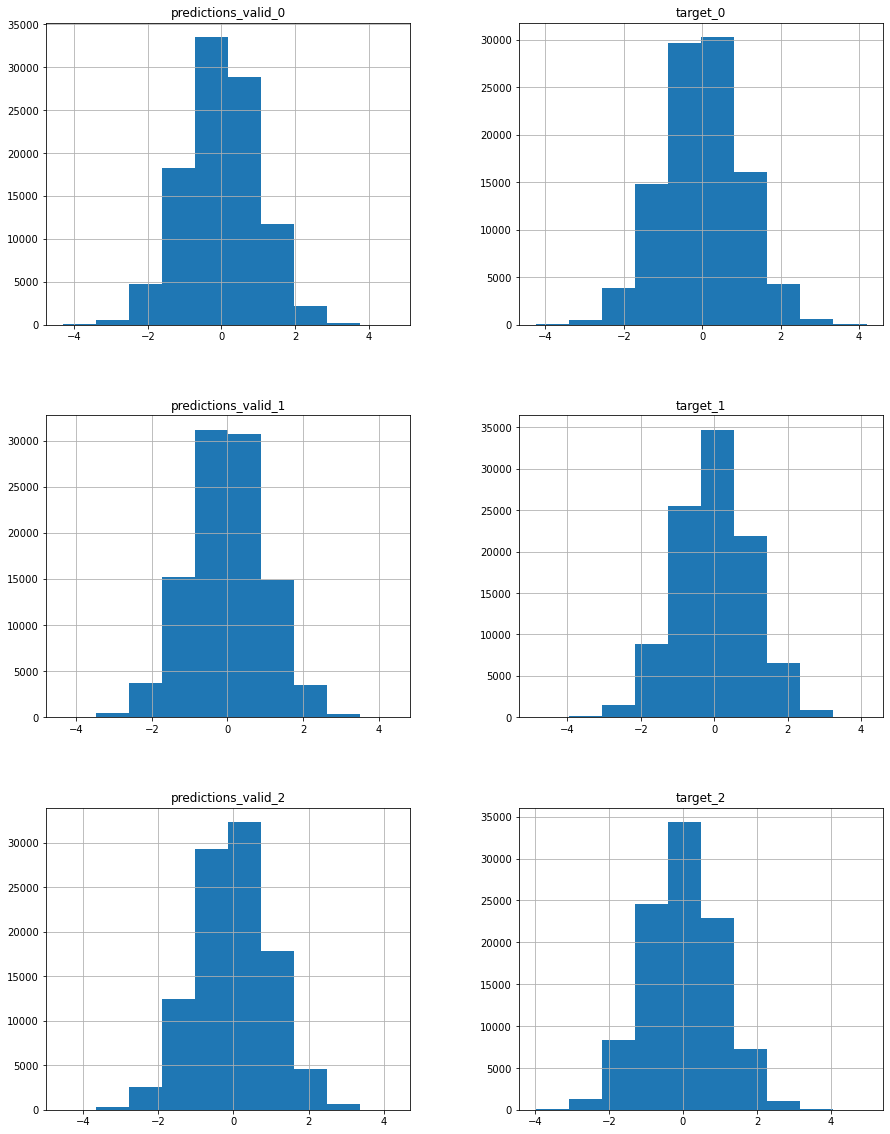

In [16]:
df = pd.DataFrame(np.random.randn (100000, 6), columns=[
    'predictions_valid_0', 'target_0',
    'predictions_valid_1', 'target_1',
    'predictions_valid_2', 'target_2'
])
df.head(5)
plt.show()
df.hist(figsize=(15, 20));

Сохранил в df значения:  
**target** - правильные ответы;  
**predictions** - предсказания.

### 2.4 Напечатайте на экране средний запас предсказанного сырья и RMSE модели

In [17]:
print('geo_0 ##############################')
print('MSE_0 модели линейной регрессии на валидационной выборке:', result_mse_0)
print('RMSE_0 модели линейной регрессии на валидационной выборке:', result_rmse_0)
print('Средний запас предсказанного сырья:', predictions_valid_0.mean())
print()
print('geo_1 ##############################')
print('MSE_1 модели линейной регрессии на валидационной выборке:', result_mse_1)
print('RMSE_1 модели линейной регрессии на валидационной выборке:', result_rmse_1)
print('Средний запас предсказанного сырья:', predictions_valid_1.mean())
print()
print('geo_2 ##############################')
print('MSE_2 модели линейной регрессии на валидационной выборке:', result_mse_2)
print('RMSE_2 модели линейной регрессии на валидационной выборке:', result_rmse_2)
print('Средний запас предсказанного сырья:', predictions_valid_2.mean())

geo_0 ##############################
MSE_0 модели линейной регрессии на валидационной выборке: 1412.2129364399243
RMSE_0 модели линейной регрессии на валидационной выборке: 37.5794217150813
Средний запас предсказанного сырья: 92.59256778438035

geo_1 ##############################
MSE_1 модели линейной регрессии на валидационной выборке: 0.7976263360391153
RMSE_1 модели линейной регрессии на валидационной выборке: 0.8930992867756167
Средний запас предсказанного сырья: 68.728546895446

geo_2 ##############################
MSE_2 модели линейной регрессии на валидационной выборке: 1602.3775813236196
RMSE_2 модели линейной регрессии на валидационной выборке: 40.02970873393434
Средний запас предсказанного сырья: 94.96504596800492


### 2.5 Проанализируйте результаты

Для анализа данных я применил две метрики, MSE и RMSE:
- **MSE**: метрика, которая сообщает нам среднеквадратичную разницу между прогнозируемыми значениями и фактическими значениями в наборе данных. Чем ниже MSE, тем лучше модель соответствует набору данных.

- **RMSE**: метрика, которая сообщает нам квадратный корень из средней квадратичной разницы между прогнозируемыми значениями и фактическими значениями в наборе данных. Чем ниже RMSE, тем лучше модель соответствует набору данных.  

Проведя анализ, я пришел к выводу, что наибольшие значения MSE у geo_0(1412) и geo_2(1602) - это говорит нам о том, что начит в этих датафреймах значения правильных ответов сильно отличаются от предсказания.  

Для дальнейшей работы я выбираю модель **geo_1** с самым низким значением RMSE в качестве «лучшей» модели, потому что именно она делает прогнозы, наиболее близкие к фактическим значениям из набора данных.

## 3. Подготовка к расчёту прибыли

### 3.1 Все ключевые значения для расчётов сохраните в отдельных переменных

In [18]:
cost = 450000 # стоимость за 1000 баррелей нефти
budget = 10000000000 # бюджет на разработку скважин
well = 200 # скважин
loss = 2.5 # вероятность убытка

Определил переменные для дальнейшей работы

### 3.2 Рассчитайте достаточный объём сырья для безубыточной разработки новой скважины. Сравните полученный объём сырья со средним запасом в каждом регионе.

In [19]:
one_well = budget/well # определил бюджет для разработки одной лунки
one_well

50000000.0

Определил бюджет для разработки одной лунки, он составил 50 000 000.00 рублей.

In [20]:
product_one_well = one_well/cost # определил необходимый запас нефти для 1 скважины
product_one_well

111.11111111111111

Определил необходимый запас сырья для 1 скважины, он составил 111 тысяч баррелей.

In [21]:
print('geo_0 ##############################')
print('Средний запас предсказанного сырья:', predictions_valid_0.mean())
print()
print('geo_1 ##############################')
print('Средний запас предсказанного сырья:', predictions_valid_1.mean())
print()
print('geo_2 ##############################')
print('Средний запас предсказанного сырья:', predictions_valid_2.mean())
print()
print('Необходимый запас сырья:', product_one_well)

geo_0 ##############################
Средний запас предсказанного сырья: 92.59256778438035

geo_1 ##############################
Средний запас предсказанного сырья: 68.728546895446

geo_2 ##############################
Средний запас предсказанного сырья: 94.96504596800492

Необходимый запас сырья: 111.11111111111111


### 3.3 Напишите выводы по этапу подготовки расчёта прибыли.

Из полученного расчета я вижу, что необходимый запас требуемого сырья составляет 111 тысяч баррелей, средней запас сырья по трем представленным регионам меньше, для выбора лучших лунок необходимо обучить модель для выбора наилучших вариантов для бурения.

## 4. Напишите функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели

### 4.1 Выберите скважины с максимальными значениями предсказаний.

In [22]:
best_prediction_0 = pd.Series(predictions_valid_0, index=target_valid_0.index).sort_values(ascending=False)
best_prediction_1 = pd.Series(predictions_valid_1, index=target_valid_1.index).sort_values(ascending=False)
best_prediction_2 = pd.Series(predictions_valid_2, index=target_valid_2.index).sort_values(ascending=False)

print('geo_0 ##############################')
print('Cкважины с максимальными значениями предсказаний с региона geo_0:')
print(best_prediction_0.head(5))
print()
print('geo_1 ##############################')
print('Cкважины с максимальными значениями предсказаний с региона geo_1:')
print(best_prediction_1.head(5))
print()
print('geo_2 ##############################')
print('Cкважины с максимальными значениями предсказаний с региона geo_2:')
print(best_prediction_2.head(5))

geo_0 ##############################
Cкважины с максимальными значениями предсказаний с региона geo_0:
93073    180.180713
46784    176.252213
78948    175.850623
43388    175.658429
6496     173.299686
dtype: float64

geo_1 ##############################
Cкважины с максимальными значениями предсказаний с региона geo_1:
38665    139.818970
20191    139.773423
14041    139.703330
24274    139.560938
92782    139.516754
dtype: float64

geo_2 ##############################
Cкважины с максимальными значениями предсказаний с региона geo_2:
98619    165.856833
46649    165.679685
82661    163.439962
53151    162.062589
18747    161.797476
dtype: float64


### 4.2 Просуммируйте целевое значение объёма сырья, соответствующее этим предсказаниям.

In [23]:
def revenue(target, predictions, count): # объявляю функцию которая принимает на вход target, prediction, count
    best_prediction = pd.Series(predictions, index=target.index).sort_values(ascending=False) # выбираю скважины с максимальным значением предсказания
    real_sorted = target[best_prediction.index][:count] # выбираю количество скважин равное значению count
    
    return cost * real_sorted.sum() - budget

Подготовил функцию для расчета прибыли.

### 4.3 Рассчитайте прибыль для полученного объёма сырья.

In [24]:
res_0 = revenue(target_valid_0, best_prediction_0, 200)
res_1 = revenue(target_valid_1, best_prediction_1, 200)
res_2 = revenue(target_valid_2, best_prediction_2, 200)

print('geo_0 ##############################')
print('Прибыль с региона geo_1:', round(res_0), 'млн. руб.')
print()
print('geo_1 ##############################')
print('Прибыль с региона geo_1:', round(res_1), 'млн. руб.')
print()
print('geo_2 ##############################')
print('Прибыль с региона geo_2:', round(res_2), 'млн. руб.')

geo_0 ##############################
Прибыль с региона geo_1: 3320826043 млн. руб.

geo_1 ##############################
Прибыль с региона geo_1: 2415086697 млн. руб.

geo_2 ##############################
Прибыль с региона geo_2: 2710349964 млн. руб.


Расчитал прибыль для каждого региона, разработка 200 скважин в регионе **geo_0** принесет больше всего прибыли.

## 5. Посчитайте риски и прибыль для каждого региона

In [25]:
### 5.1 Примените технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.def bootstrap (target, predictions):

def bootstrap(target, probabilities):
    values = []
    state = np.random.RandomState(12345)
    for i in range(1000):
        target_subsample = target.sample(500, replace=True, random_state=state)
        probs_subsample = probabilities[target_subsample.index]
        res = revenue(target_subsample, probs_subsample, 200)
        values.append(res)
    
    values = pd.Series(values)
    mean = values.mean()
    print('Средняя выручка:', round(mean), 'млн. руб.')

### 5.2 Найдите среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.

    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    print('2.5%-квантиль:', round(lower), 'млн. руб.')
    print('97.5%-квантиль:', round(upper), 'млн. руб.')
      
    risk = (values < 0).mean()
    if risk*100 < loss:
        print('Вероятность убытков в пределах 2.5% =', risk*100,'%')
    else:
        print('Вероятность убытков велика =', risk*100,'%')
    return

Подготовил функцию для расчета.

In [26]:
print('geo_0 ##############################')
geo_0 = bootstrap(target_valid_0, best_prediction_0)
print()
print('geo_1 ##############################')
geo_1 = bootstrap(target_valid_1, best_prediction_1)
print()
print('geo_2 ##############################')
geo_2 = bootstrap(target_valid_2, best_prediction_2)

geo_0 ##############################
Средняя выручка: 425938527 млн. руб.
2.5%-квантиль: -102090095 млн. руб.
97.5%-квантиль: 947976353 млн. руб.
Вероятность убытков велика = 6.0 %

geo_1 ##############################
Средняя выручка: 515222773 млн. руб.
2.5%-квантиль: 68873225 млн. руб.
97.5%-квантиль: 931547591 млн. руб.
Вероятность убытков в пределах 2.5% = 1.0 %

geo_2 ##############################
Средняя выручка: 435008363 млн. руб.
2.5%-квантиль: -128880547 млн. руб.
97.5%-квантиль: 969706954 млн. руб.
Вероятность убытков велика = 6.4 %


### 5.3 Напишите выводы: предложите регион для разработки скважин и обоснуйте выбор.

В результе проведенного исследования, я делаю вывод, что лучшим регионом для исследования является регион **geo_1**, средняя выручка по нему составит 515 222 773 млн. руб., а вероятность убытка составляет всего 1%.